In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
train=pd.read_csv('/content/train.csv')
test=pd.read_csv('/content/test.csv')

In [ ]:
train1=train.copy()
test1=test.copy()

In [ ]:
train.columns

Index(['id', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries', 'smoking'],
      dtype='object')

In [ ]:
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   159256 non-null  int64  
 1   age                  159256 non-null  int64  
 2   height(cm)           159256 non-null  int64  
 3   weight(kg)           159256 non-null  int64  
 4   waist(cm)            159256 non-null  float64
 5   eyesight(left)       159256 non-null  float64
 6   eyesight(right)      159256 non-null  float64
 7   hearing(left)        159256 non-null  int64  
 8   hearing(right)       159256 non-null  int64  
 9   systolic             159256 non-null  int64  
 10  relaxation           159256 non-null  int64  
 11  fasting blood sugar  159256 non-null  int64  
 12  Cholesterol          159256 non-null  int64  
 13  triglyceride         159256 non-null  int64  
 14  HDL                  159256 non-null  int64  
 15  LDL              

In [ ]:
print(train.isnull().sum())
print(test.isnull().sum())

id                     0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
smoking                0
dtype: int64
id                     0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL         

In [ ]:
print(train.duplicated().sum())
print(test.duplicated().sum())

0
0


In [ ]:
id=test['id']

In [ ]:
train_df=[col for col in train if not col in ['id','smoking']]
train_df

['age',
 'height(cm)',
 'weight(kg)',
 'waist(cm)',
 'eyesight(left)',
 'eyesight(right)',
 'hearing(left)',
 'hearing(right)',
 'systolic',
 'relaxation',
 'fasting blood sugar',
 'Cholesterol',
 'triglyceride',
 'HDL',
 'LDL',
 'hemoglobin',
 'Urine protein',
 'serum creatinine',
 'AST',
 'ALT',
 'Gtp',
 'dental caries']

In [ ]:
train.drop(columns='id',inplace=True)
test.drop(columns='id',inplace=True)

In [ ]:
x=train.iloc[:,:22]
y=train['smoking']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
accuracy_score(y_test,rf.predict(x_test))

0.7717568755494161

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
accuracy_score(y_test,lr.predict(x_test))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7355896019088284

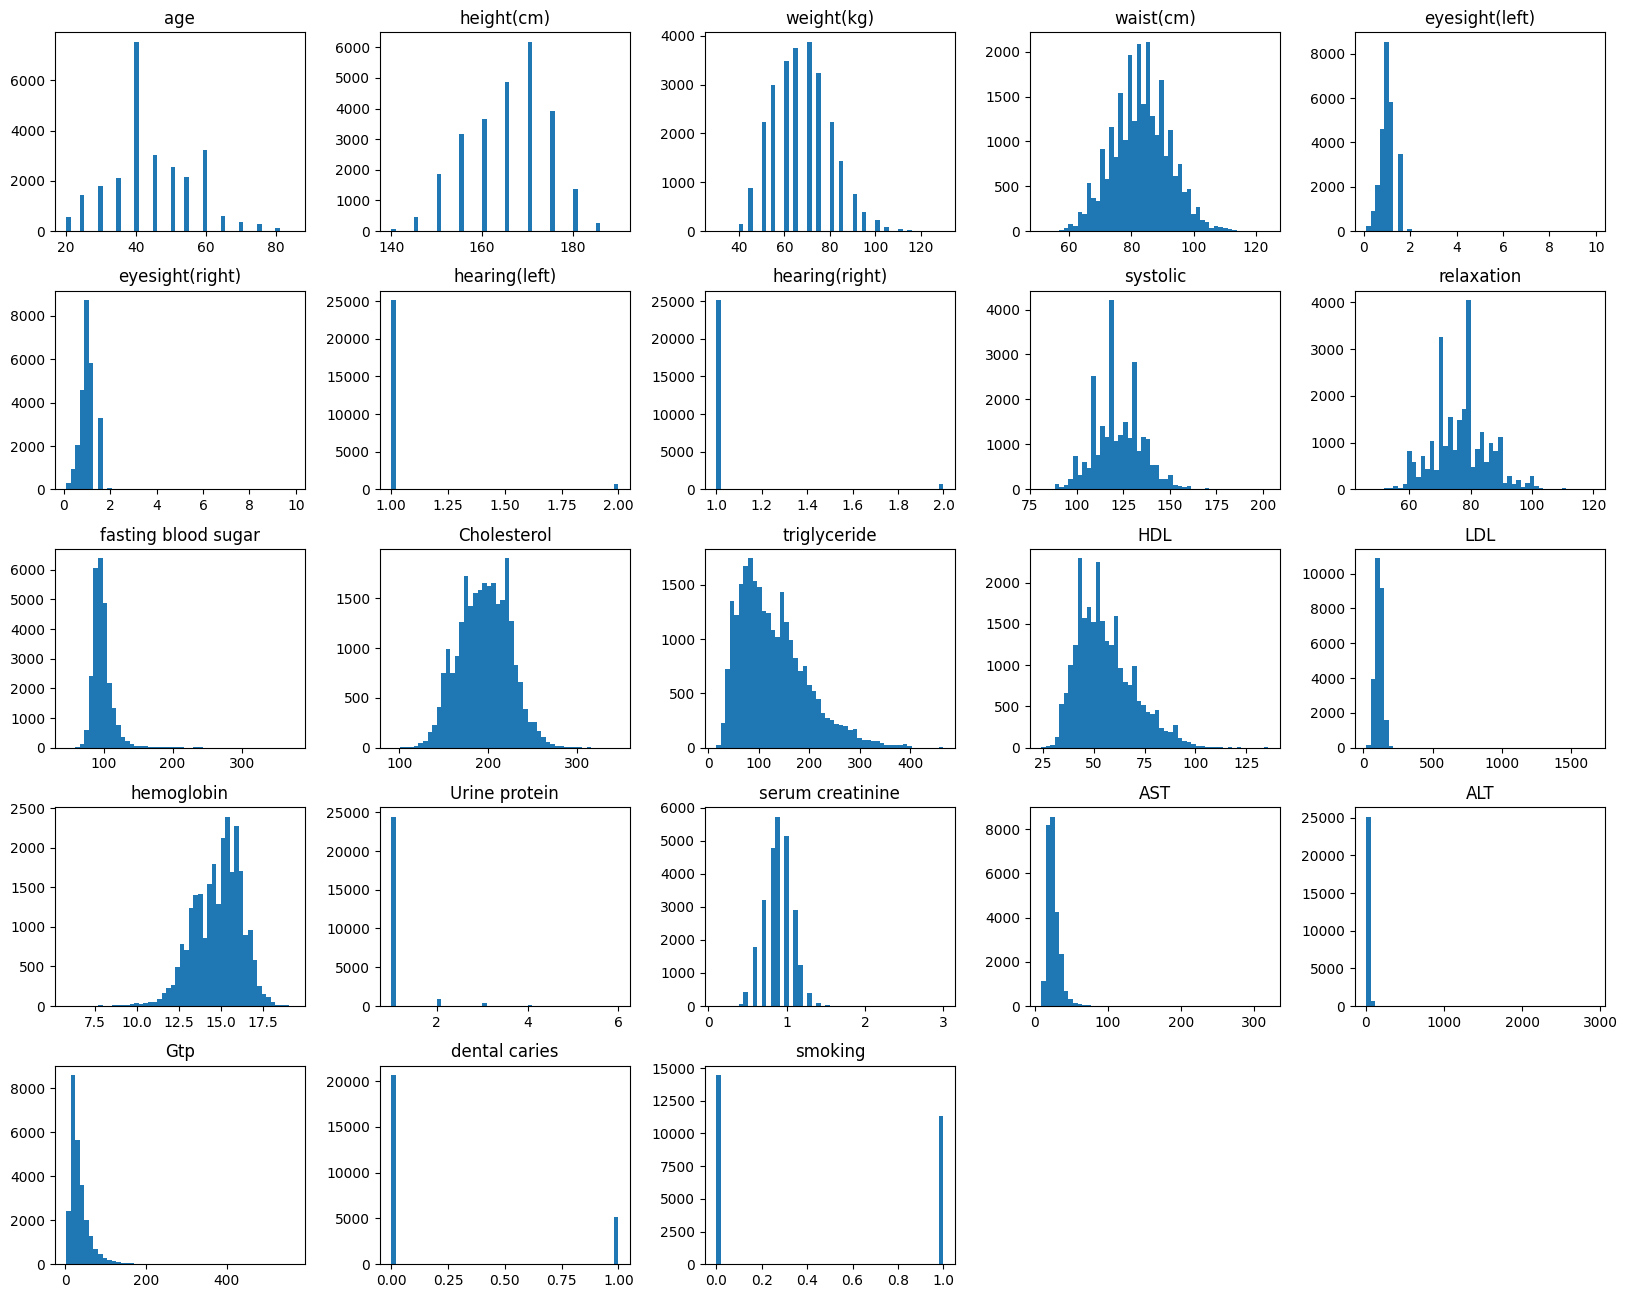

In [ ]:

train.hist(bins=50,figsize=(20,16),grid=False)
plt.show()

<ipython-input-9-cb9045b04779>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax=plt.subplots(1,2,figsize=(15,6))


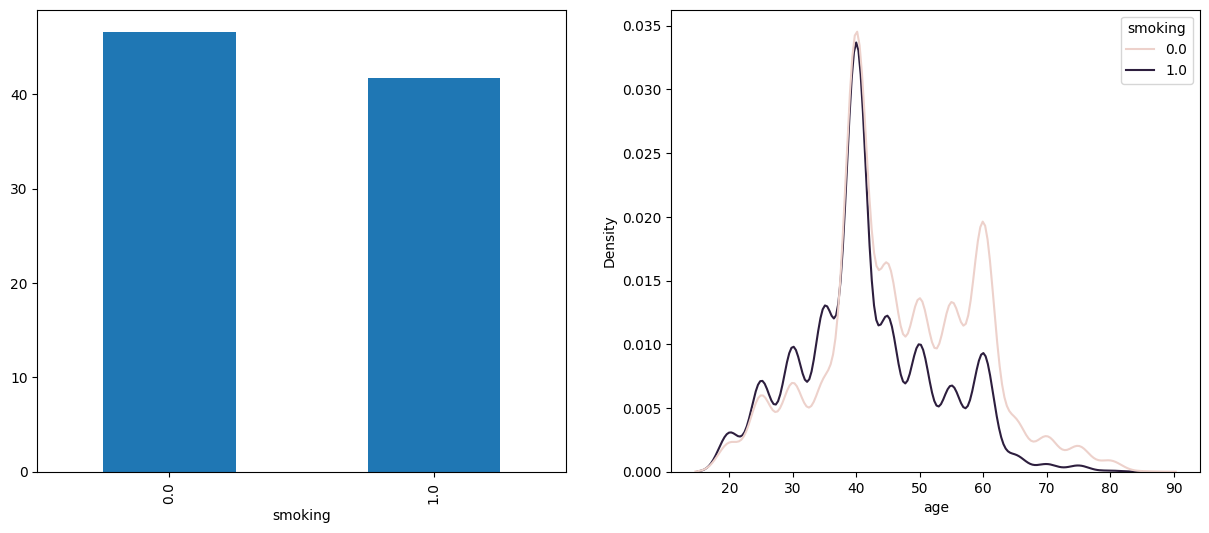

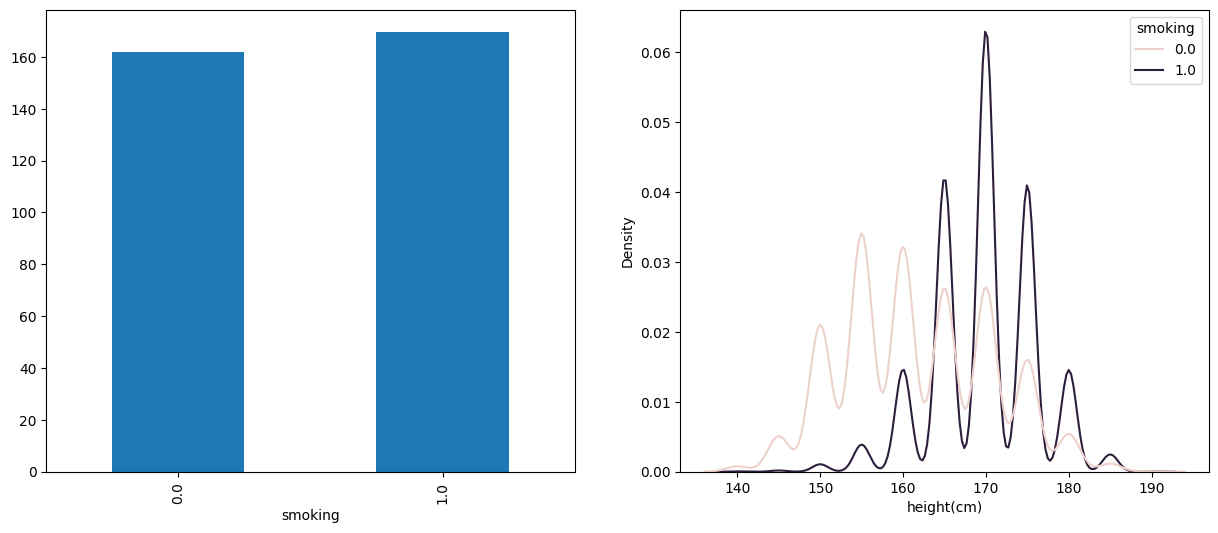

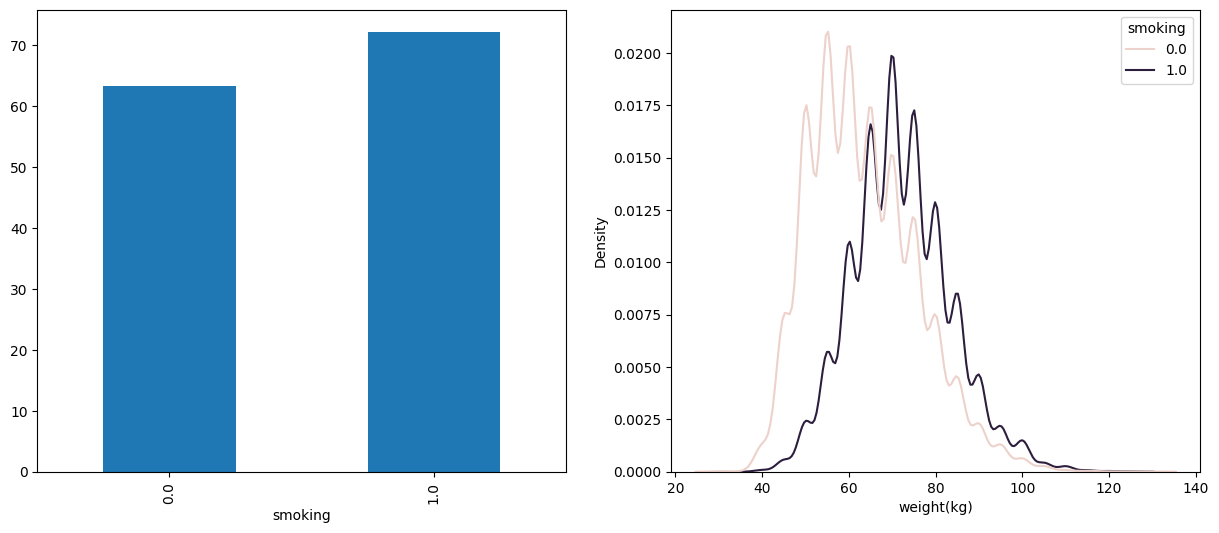

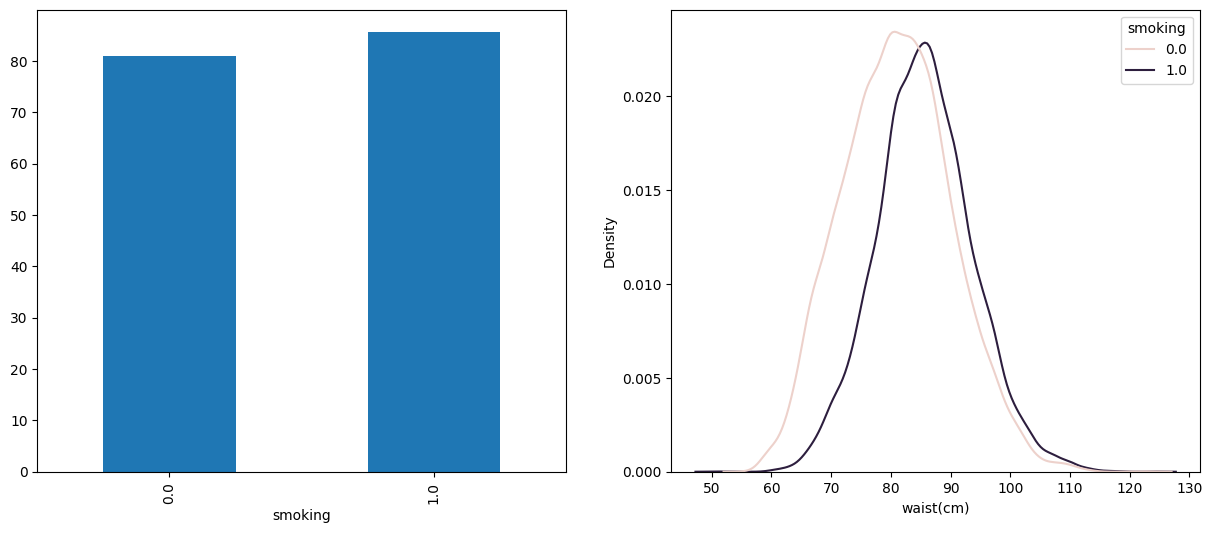

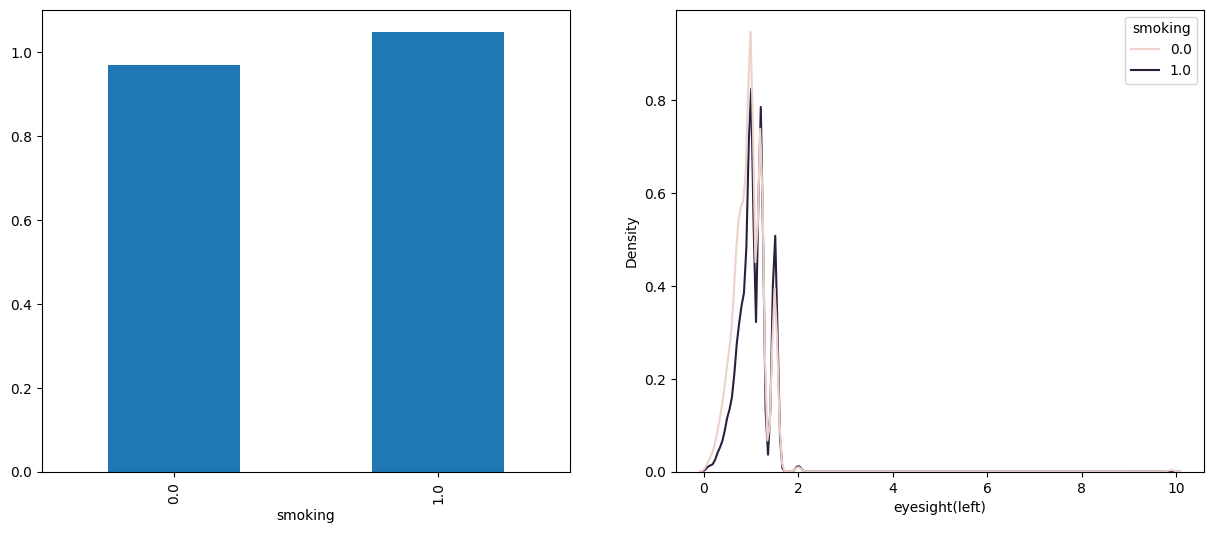

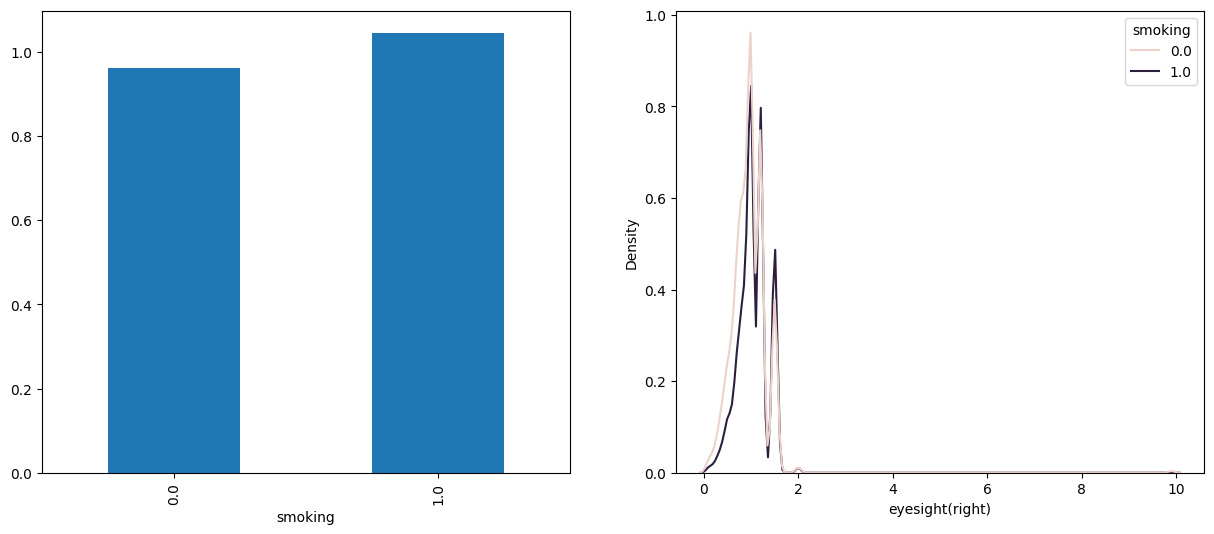

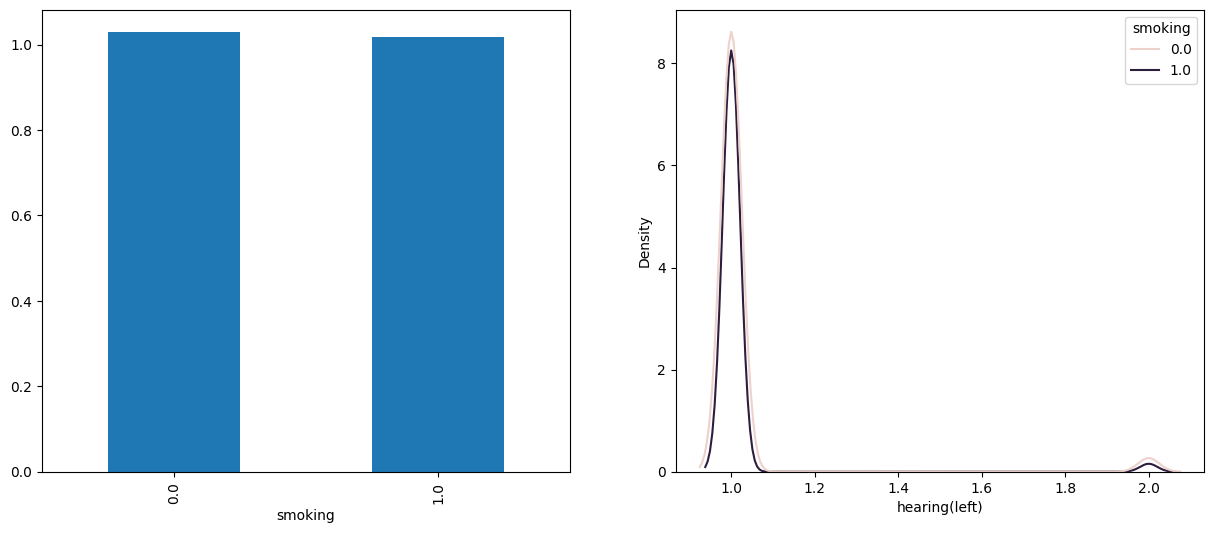

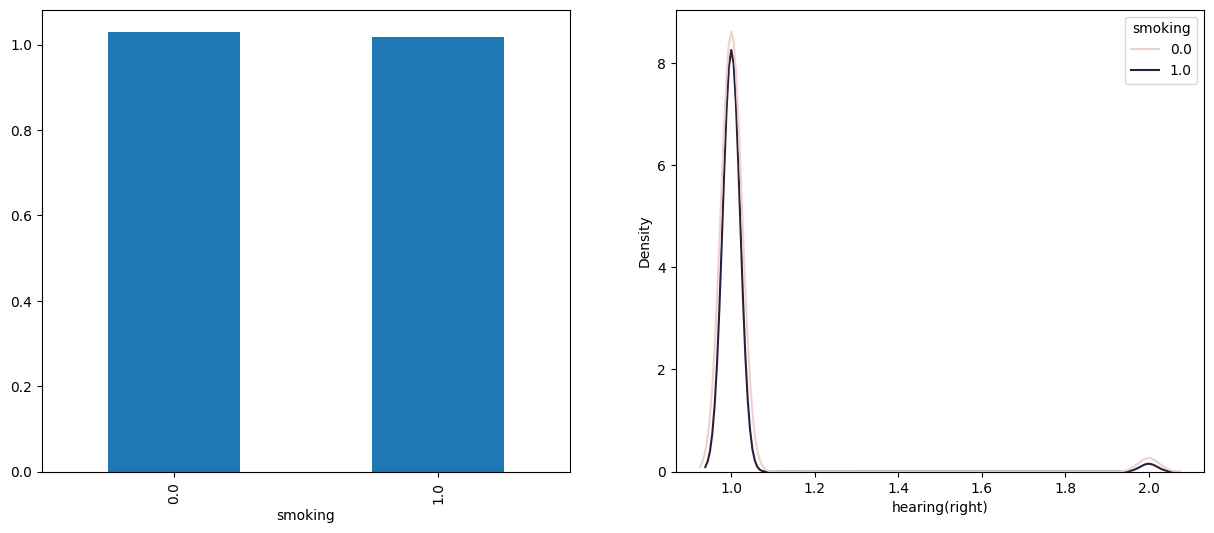

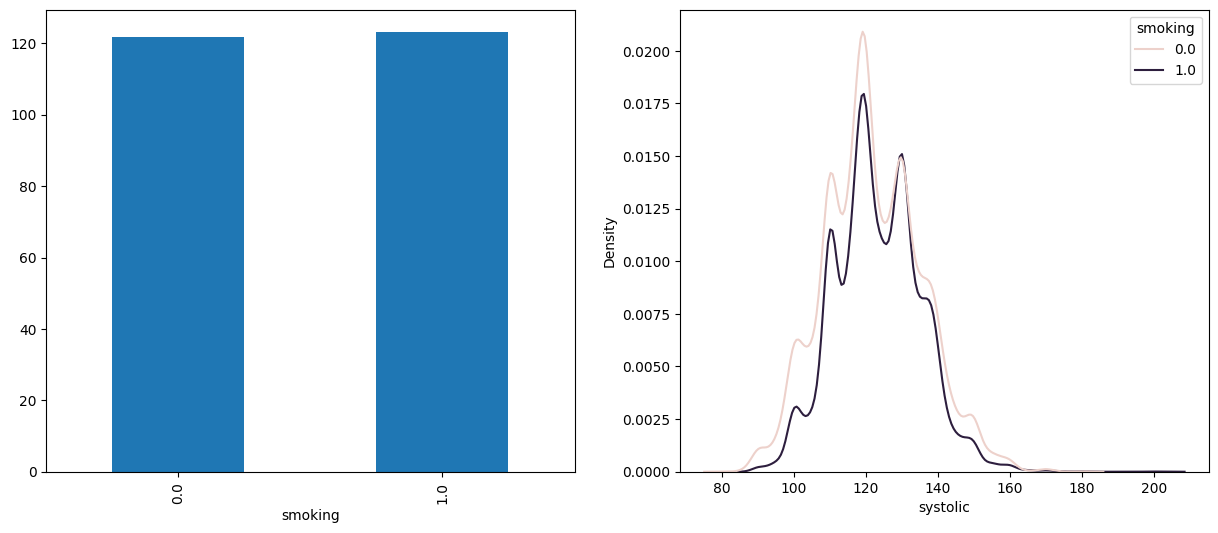

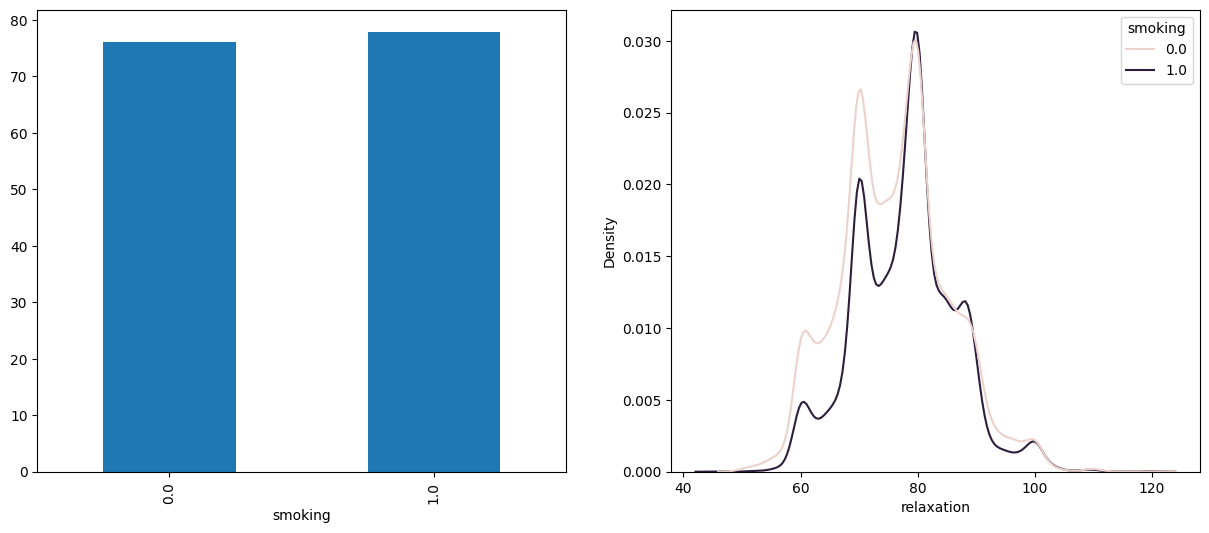

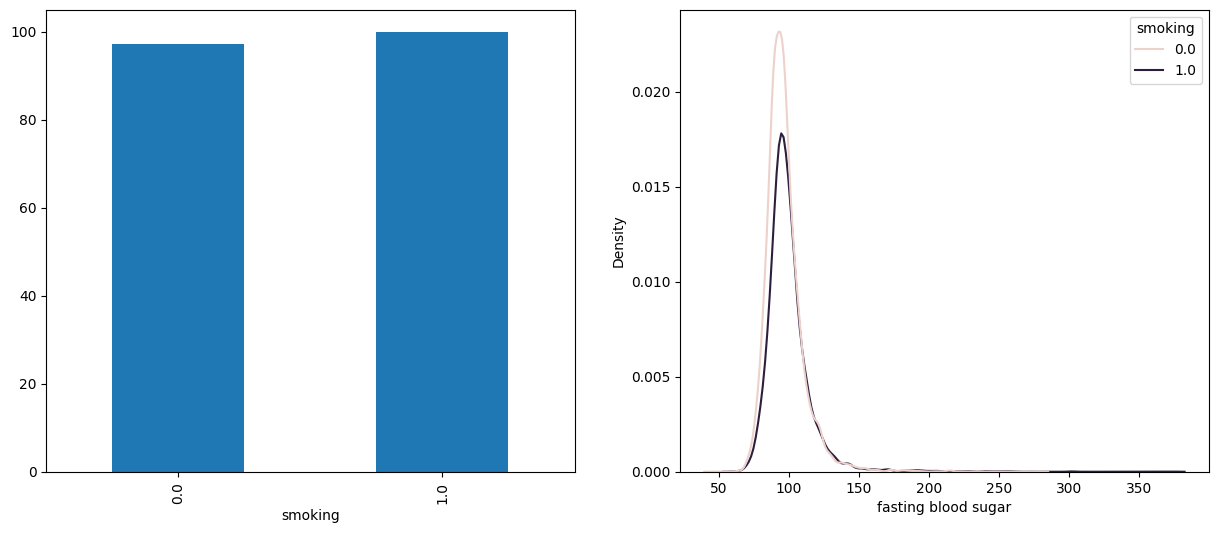

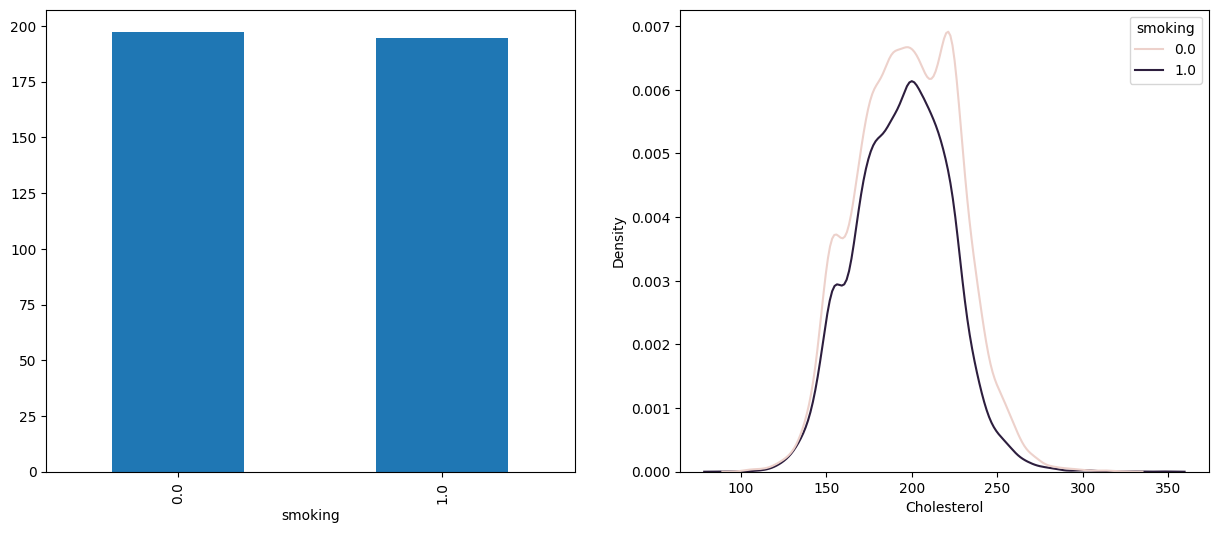

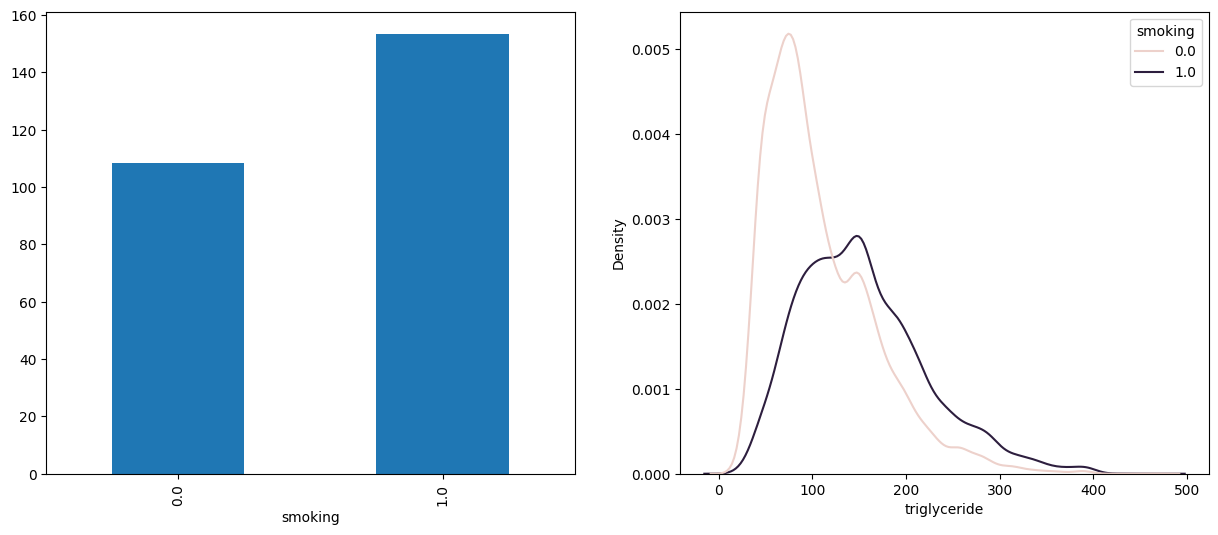

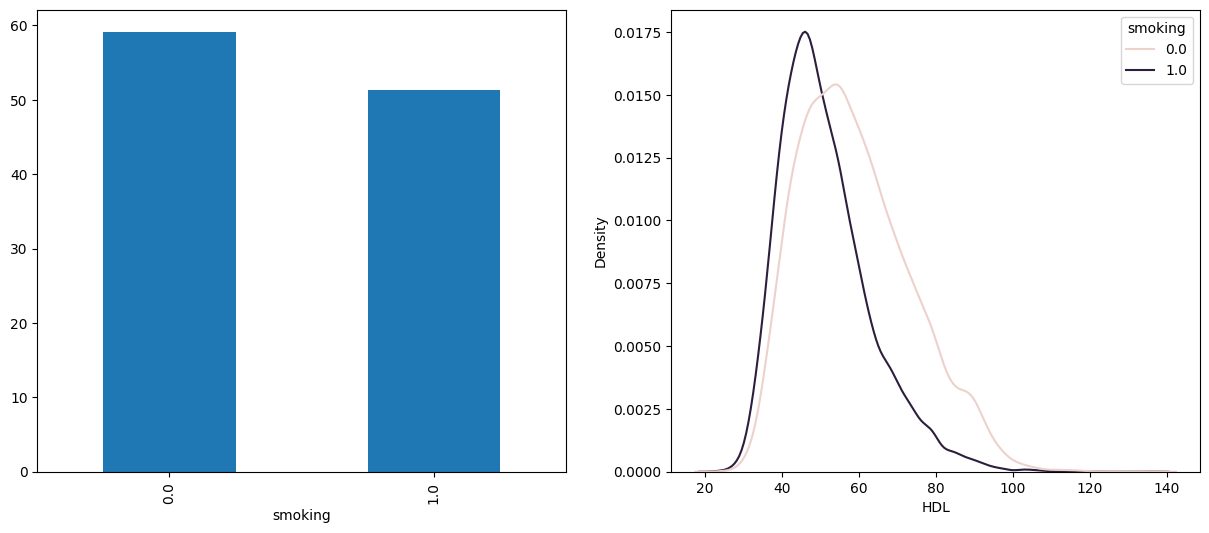

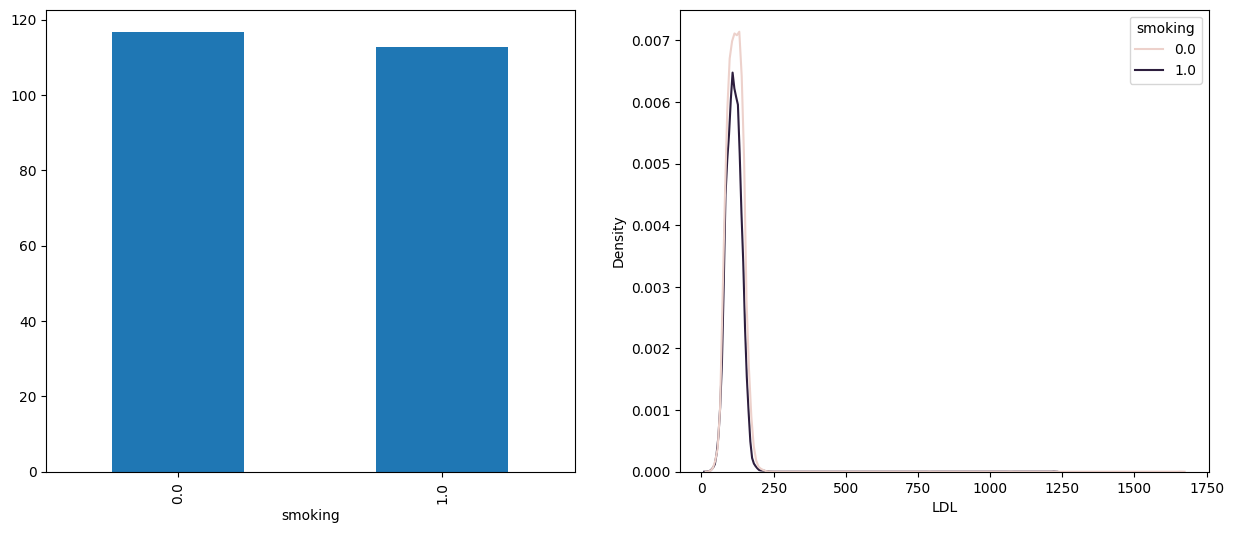

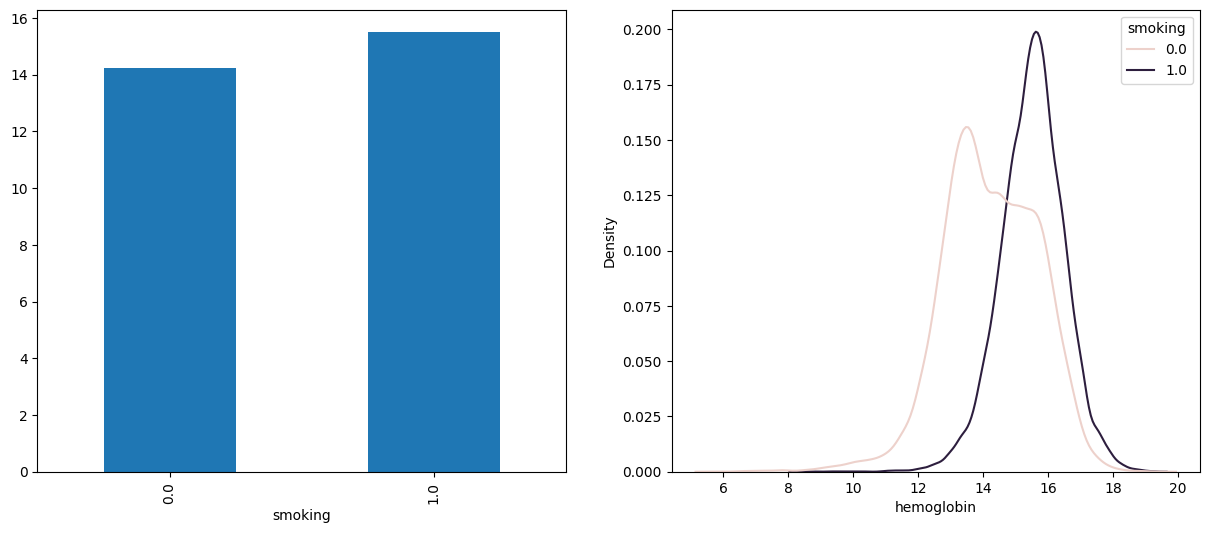

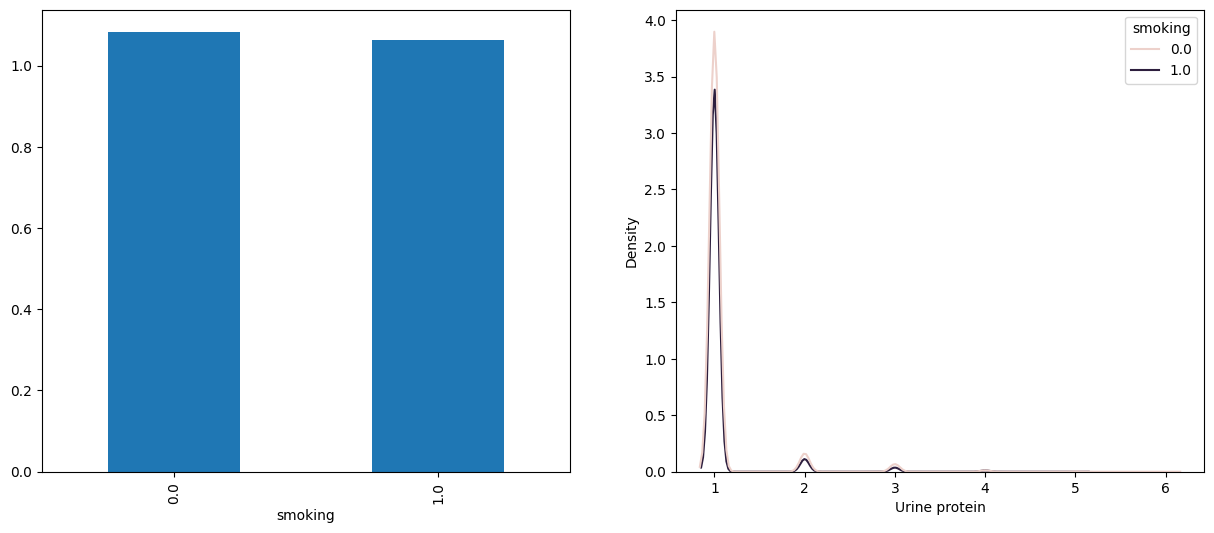

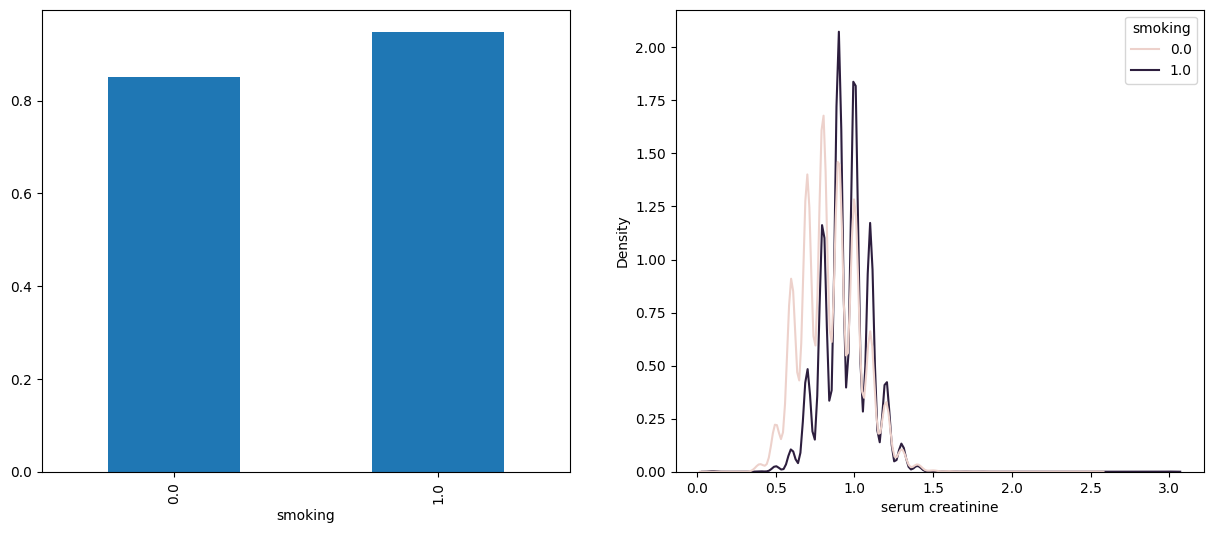

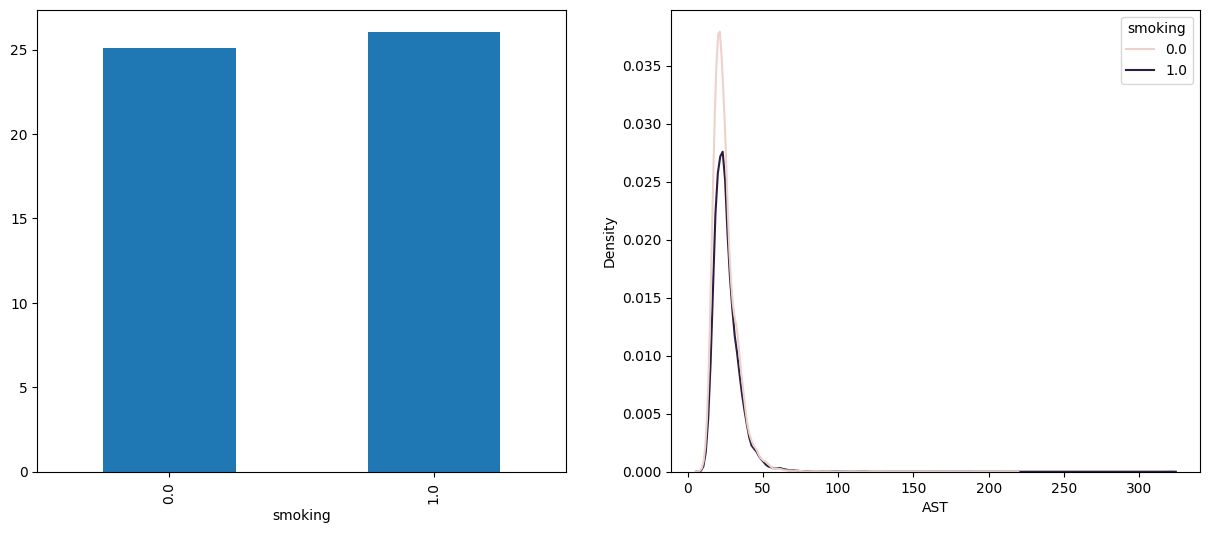

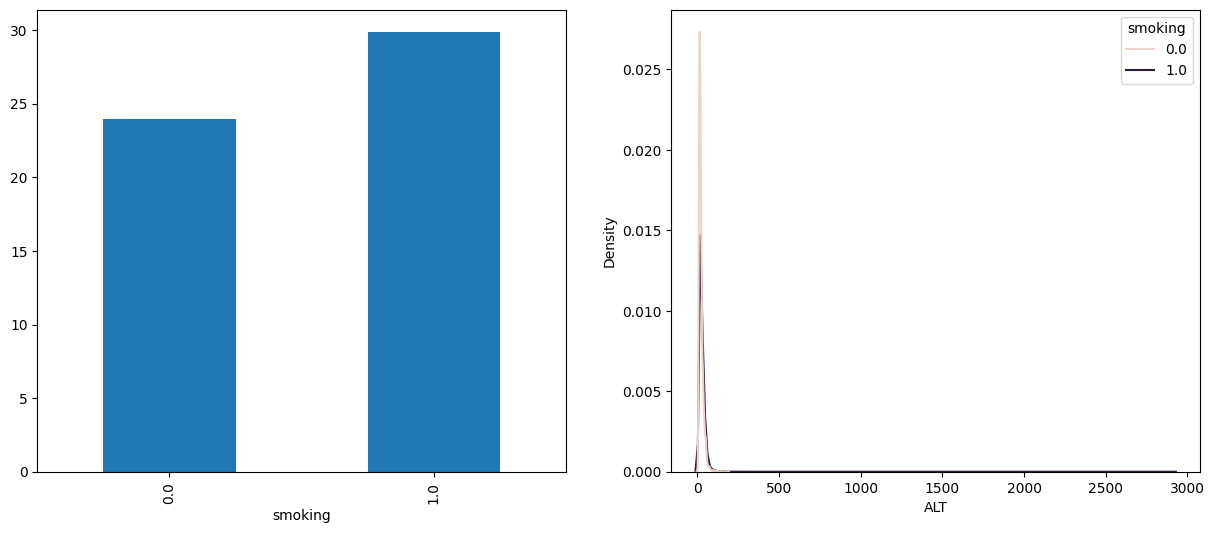

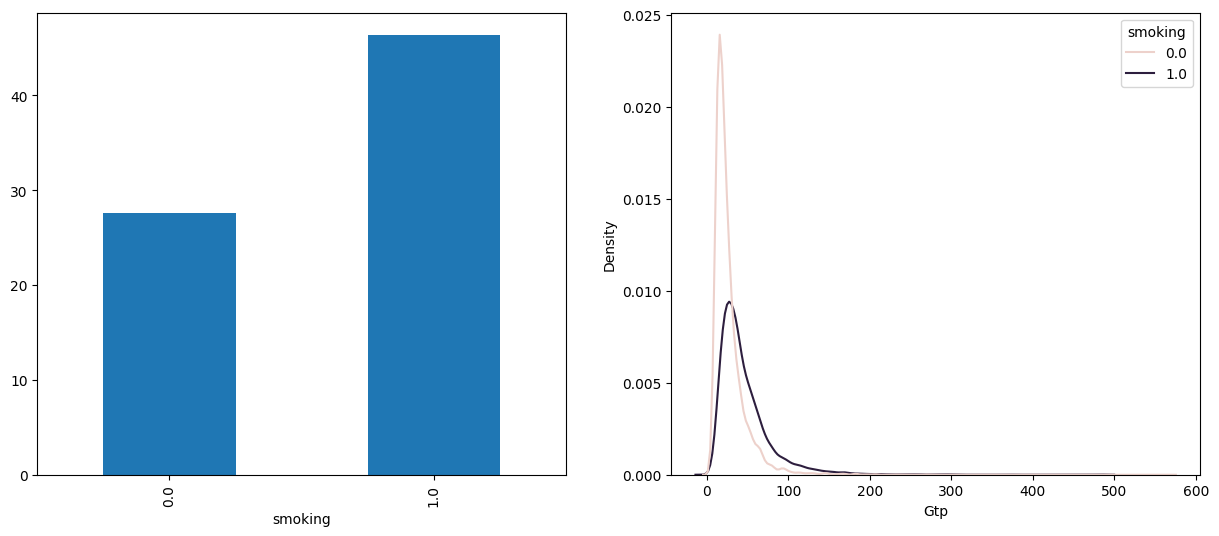

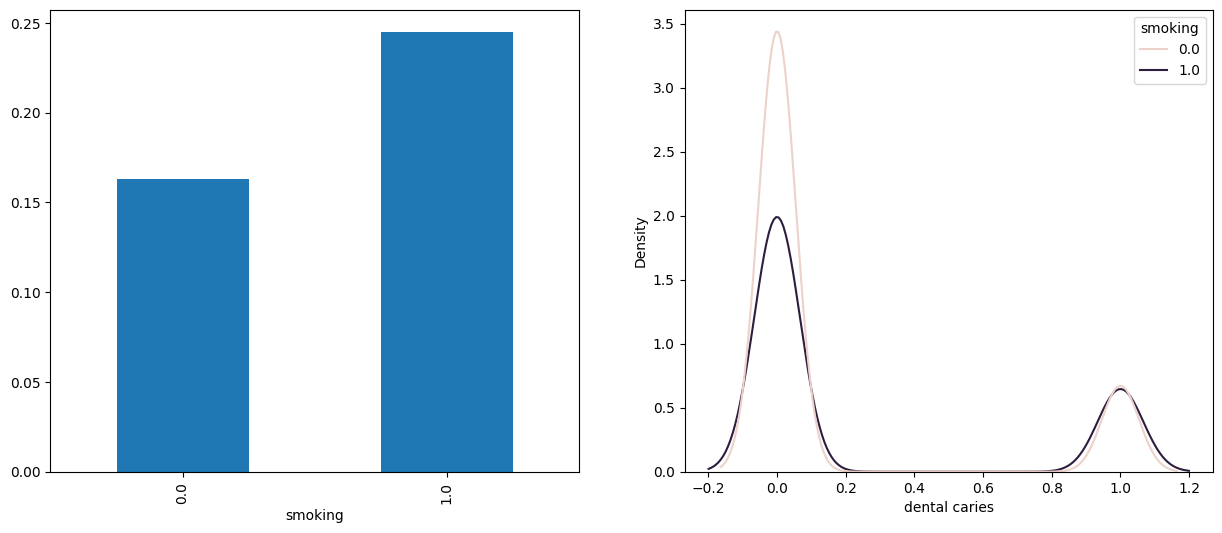

In [ ]:
for col in train_df:
    fig, ax=plt.subplots(1,2,figsize=(15,6))
    train.groupby('smoking')[col].mean().plot(kind='bar',ax=ax[0])

    sns.kdeplot(data=train,x=col,hue='smoking',ax=ax[1])

In [ ]:
train.columns

Index(['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries', 'smoking'],
      dtype='object')

In [ ]:
sum=pd.DataFrame(train.dtypes,columns=['dtypes'])
sum['missing#']=train.isna().sum().values
sum['missing%']=train.isna().sum()/len(train)
sum['nunique']=train.nunique().values
sum['count']=train.count().values
sum['min']=train.min()
sum['max']=train.max()
sum['mean']=train.mean()



In [ ]:
sum.style.background_gradient(cmap='Blues')

,dtypes,missing#,missing%,nunique,count,min,max,mean
age,float64,1,0.000039,15,25802,20.000000,85.000000,44.494497
height(cm),float64,1,0.000039,12,25802,140.000000,190.000000,165.270754
weight(kg),float64,1,0.000039,23,25802,30.000000,130.000000,67.174638
waist(cm),float64,1,0.000039,433,25802,51.000000,124.000000,83.056941
eyesight(left),float64,1,0.000039,15,25802,0.100000,9.900000,1.003380
eyesight(right),float64,1,0.000039,15,25802,0.100000,9.900000,0.998488
hearing(left),float64,1,0.000039,2,25802,1.000000,2.000000,1.025037
hearing(right),float64,1,0.000039,2,25802,1.000000,2.000000,1.025076
systolic,float64,1,0.000039,89,25802,81.000000,203.000000,122.471746
relaxation,float64,1,0.000039,64,25802,46.000000,120.000000,76.889698


<Axes: >

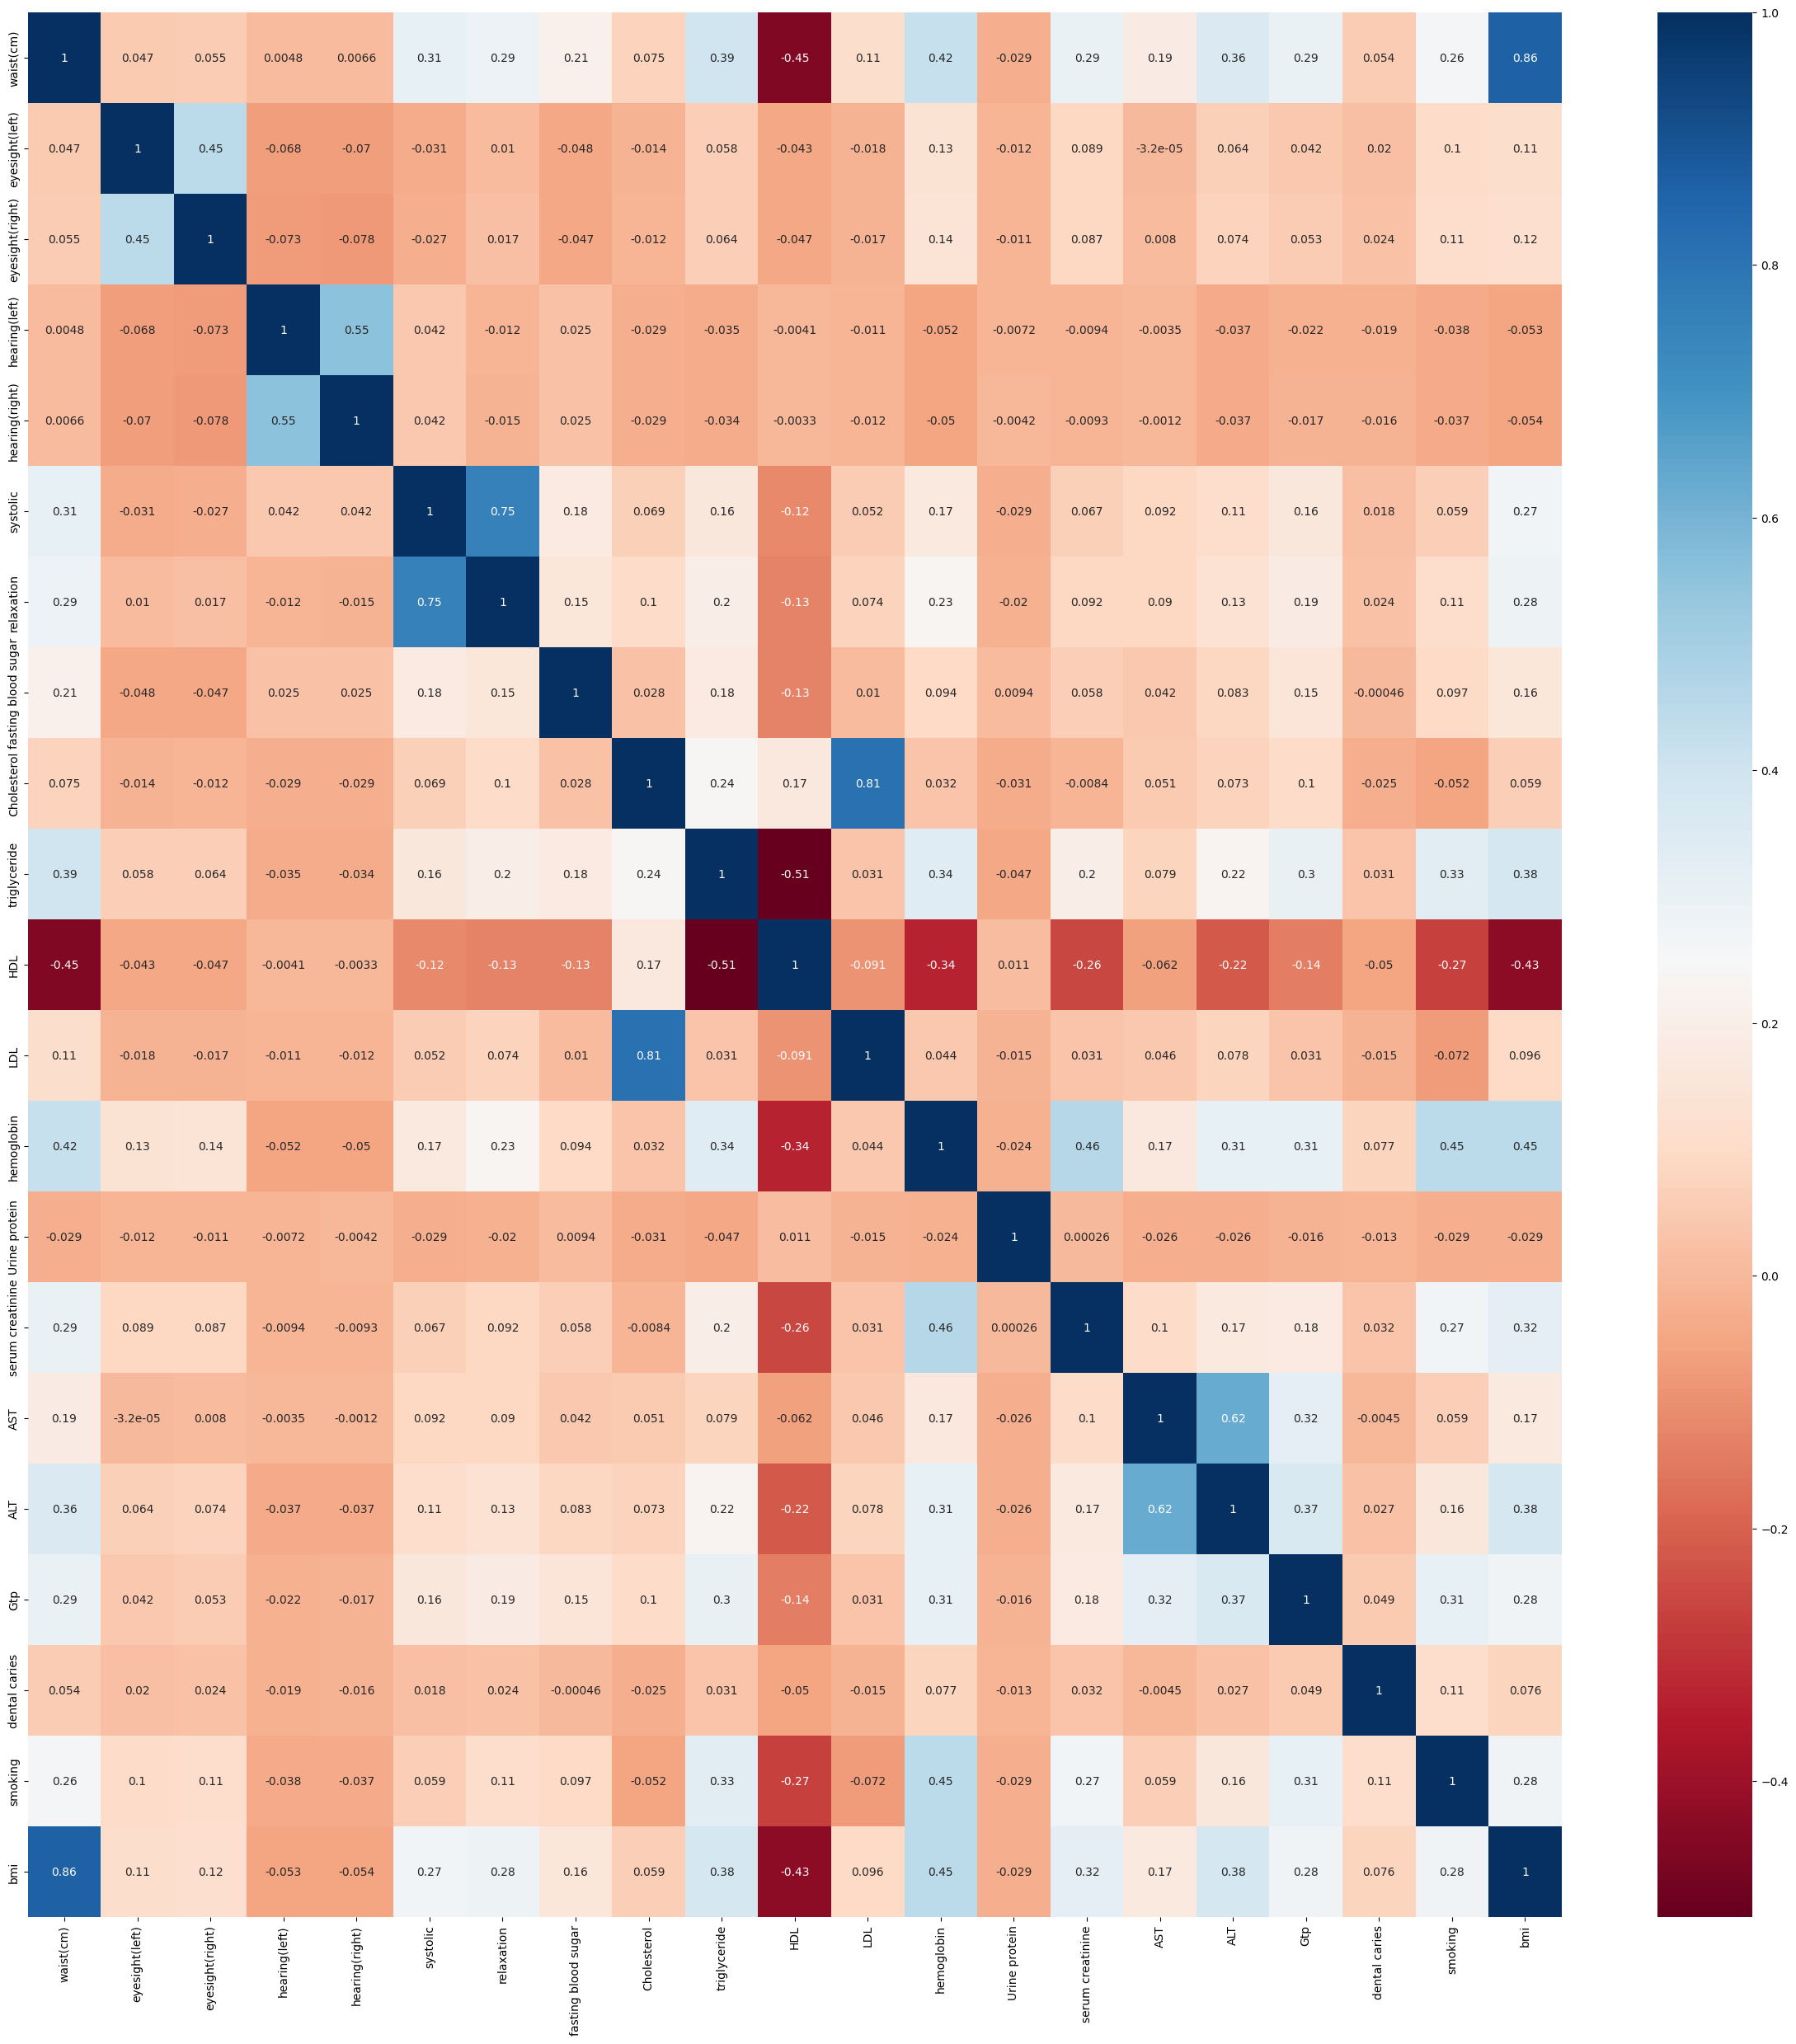

In [ ]:
corr=train.corr(numeric_only=True)
fig,ax=plt.subplots(figsize=(30,30))
sns.heatmap(corr,annot=True,cmap='RdBu')

In [ ]:
def cal1(age):
    if  age <40:
        return 'young'
    else:
        return 'old'

train['age']=train['age'].apply(cal1)
test['age']=test['age'].apply(cal1)

In [ ]:
train.age.value_counts()

old      121741
young     37515
Name: age, dtype: int64

In [ ]:
train['bmi']=train['weight(kg)']/train['height(cm)']
test['bmi']=test['weight(kg)']/test['height(cm)']

In [ ]:
train.drop(columns=['height(cm)','weight(kg)','LDL','waist(cm)'],inplace=True)
test.drop(columns=['height(cm)','weight(kg)','LDL','waist(cm)'],inplace=True)

In [ ]:
train

,age,eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking,bmi
0,old,0.5,0.6,1,1,135,87,94,172,300,40,16.5,1,1.0,22,25,27,0,1,0.363636
1,old,0.6,0.7,2,2,146,83,147,194,55,57,16.2,1,1.1,27,23,37,1,0,0.393939
2,young,0.4,0.5,1,1,118,75,79,178,197,45,17.4,1,0.8,27,31,53,0,1,0.441176
3,young,1.5,1.2,1,1,131,88,91,180,203,38,15.9,1,1.0,20,27,30,1,0,0.527778
4,young,1.5,1.0,1,1,121,76,91,155,87,44,15.4,1,0.8,19,13,17,0,1,0.363636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159251,old,1.5,2.0,1,1,127,80,64,238,47,72,14.5,1,0.8,25,26,13,0,0,0.290323
159252,old,1.0,1.0,1,1,120,80,89,213,202,64,14.5,1,0.6,21,20,18,0,0,0.483871
159253,old,1.5,1.0,1,1,114,70,84,189,45,87,10.9,1,0.6,15,9,12,0,0,0.312500
159254,old,1.2,1.0,1,1,121,90,122,165,148,55,14.4,1,1.1,22,17,37,0,1,0.454545


<Axes: >

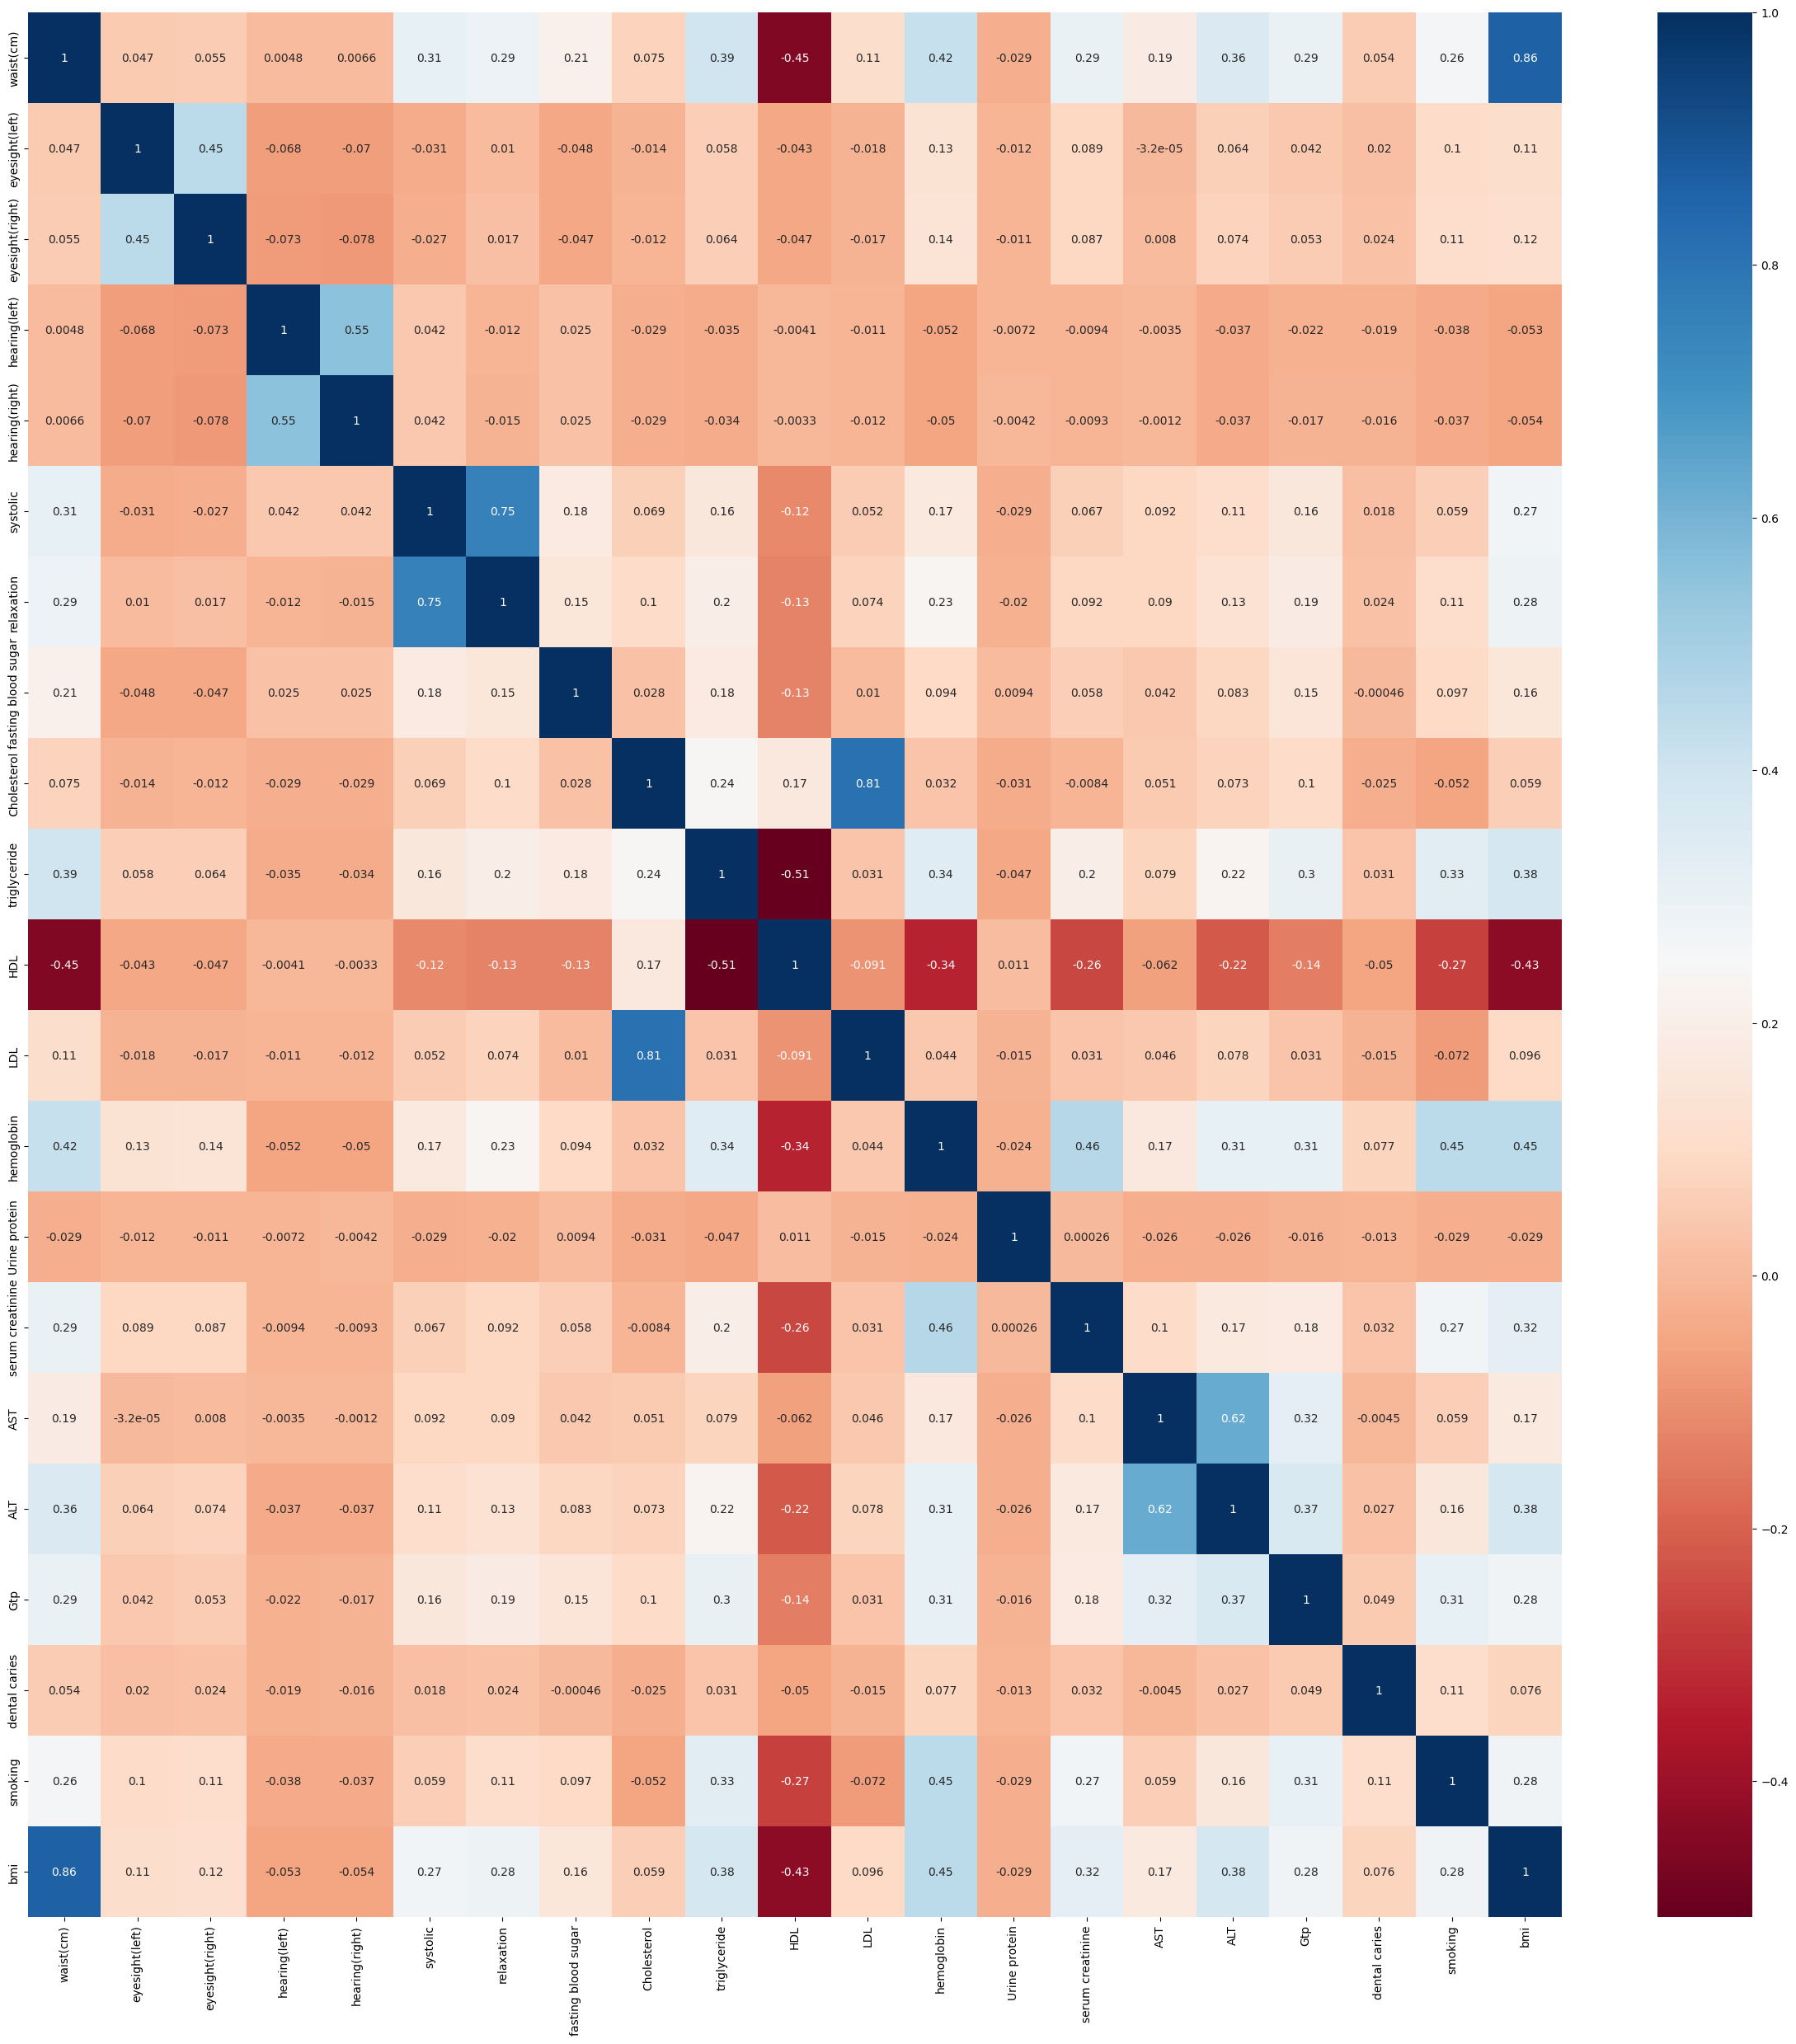

In [ ]:
corr=train.corr(numeric_only=True)
fig,ax=plt.subplots(figsize=(30,30))
sns.heatmap(corr,annot=True,cmap='RdBu')

In [ ]:
x=train.drop(columns='smoking')
y=train['smoking']
y
x

,eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,bmi,age_young
0,0.5,0.6,1,1,135,87,94,172,300,40,16.5,1,1.0,22,25,27,0,0.363636,0
1,0.6,0.7,2,2,146,83,147,194,55,57,16.2,1,1.1,27,23,37,1,0.393939,0
2,0.4,0.5,1,1,118,75,79,178,197,45,17.4,1,0.8,27,31,53,0,0.441176,1
3,1.5,1.2,1,1,131,88,91,180,203,38,15.9,1,1.0,20,27,30,1,0.527778,1
4,1.5,1.0,1,1,121,76,91,155,87,44,15.4,1,0.8,19,13,17,0,0.363636,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159251,1.5,2.0,1,1,127,80,64,238,47,72,14.5,1,0.8,25,26,13,0,0.290323,0
159252,1.0,1.0,1,1,120,80,89,213,202,64,14.5,1,0.6,21,20,18,0,0.483871,0
159253,1.5,1.0,1,1,114,70,84,189,45,87,10.9,1,0.6,15,9,12,0,0.312500,0
159254,1.2,1.0,1,1,121,90,122,165,148,55,14.4,1,1.1,22,17,37,0,0.454545,0


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
train=pd.get_dummies(train,columns=['age'],drop_first=True,dtype=int)
test=pd.get_dummies(test,columns=['age'],drop_first=True,dtype=int)

In [ ]:
test
x_test

,waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,bmi,age_young
145654,84.0,0.8,1.0,1,1,122,70,100,188,238,...,96,16.0,1,0.7,31,22,32,0,0.457143,1
49118,88.0,1.2,1.2,1,1,100,64,92,154,122,...,80,15.0,1,0.9,22,22,17,0,0.432432,1
21769,76.0,1.2,1.2,1,1,130,85,90,194,134,...,134,16.9,1,0.8,24,32,41,1,0.375000,1
108299,87.8,0.7,0.2,1,1,119,62,91,261,103,...,167,13.2,1,0.9,21,16,14,0,0.387097,0
117130,85.0,0.8,0.6,1,1,142,93,108,179,109,...,108,15.5,1,0.7,27,40,61,0,0.424242,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11934,76.4,1.5,0.5,1,1,110,70,87,152,76,...,86,14.6,1,0.7,22,32,17,0,0.363636,1
115975,83.0,1.0,1.0,1,1,140,100,101,201,96,...,95,14.3,1,0.6,22,26,21,0,0.419355,0
158289,84.0,1.2,1.2,1,1,117,65,113,168,192,...,92,16.3,1,1.1,23,26,63,0,0.400000,0
142308,60.0,1.0,1.0,1,1,100,60,86,166,127,...,82,13.9,1,0.7,21,11,26,0,0.294118,0


In [ ]:
rf=RandomForestClassifier()#n_estimators=200,max_samples=0.6,oob_score=True)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
accuracy_score(y_pred,y_test)

0.7611452969986187

In [ ]:
rf.oob_score_

0.7633041348780258

In [ ]:
rf.feature_importances_

array([0.03096718, 0.0313108 , 0.00200941, 0.00204489, 0.05113991,
       0.04695018, 0.05369156, 0.06708241, 0.10251603, 0.06078143,
       0.17582076, 0.00486043, 0.05970792, 0.04953244, 0.05607901,
       0.11879761, 0.00848004, 0.06241252, 0.01581545])

In [ ]:
x['eyesight_mean']=(x['eyesight(left)']+x['eyesight(right)'])/2
x['hearing_mean']=(x['hearing(left)']+x['hearing(right)'])/2

In [ ]:
x.drop(columns=['hearing(left)','hearing(right)','eyesight(left)','eyesight(right)'],inplace=True)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [ ]:
rf=RandomForestClassifier(n_estimators=200,max_samples=0.6,oob_score=True)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
accuracy_score(y_pred,y_test)

0.7604859977395454

In [ ]:
x_train

,systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,bmi,age_young,eyesight_mean,hearing_mean
60700,120,78,102,179,48,60,11.8,1,0.6,14,11,9,0,0.333333,0,0.50,1.0
44065,139,89,243,210,98,67,16.3,1,0.6,17,24,25,0,0.333333,0,0.85,1.0
39538,109,71,89,154,45,48,13.4,1,0.6,19,15,16,0,0.354839,0,1.20,1.0
105427,130,80,89,230,83,54,14.6,1,0.7,14,13,26,0,0.375000,0,0.75,1.0
148669,120,82,87,163,117,54,13.8,1,0.9,25,30,21,0,0.500000,1,1.10,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,110,80,97,225,204,42,15.3,1,1.0,41,87,65,0,0.444444,1,1.20,1.0
103694,143,95,96,169,156,48,15.9,1,0.9,24,26,53,1,0.393939,0,1.35,1.0
131932,100,62,88,166,93,74,13.8,1,0.6,21,13,14,0,0.375000,0,1.00,1.0
146867,135,81,87,175,86,42,15.0,1,1.0,33,53,40,0,0.500000,0,1.35,1.0


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
accuracy_score(y_test,dt.predict(x_test))


0.6769747582569383

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
accuracy_score(y_test,lr.predict(x_test))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7266733643099335

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
accuracy_score(y_test,knn.predict(x_test))

0.6693457239733769

In [ ]:
estimators=[('lr',lr),('knn',knn),('rf',rf)]


In [ ]:
from sklearn.ensemble import VotingClassifier
vc=VotingClassifier(estimators=estimators,voting='hard')
vc.fit(x_train,y_train)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('knn', KNeighborsClassifier(n_neighbors=3)),
                             ('rf',
                              RandomForestClassifier(max_samples=0.6,
                                                     n_estimators=200,
                                                     oob_score=True))])

In [ ]:
accuracy_score(y_test,vc.predict(x_test))

0.7451651387667965

In [ ]:
sub=pd.DataFrame()
sub['id']=id
sub['smoking']=rf.predict(test)
sub.to_csv('sub.csv',index=False)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid= {

    'min_samples_split':[2,10,50,100],
    'max_features':['sqrt','log2',None],

    'max_samples':[None,0.6,0.7],
    'max_depth':[8,20,None,16]



}

print(param_grid)


In [ ]:
#grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=2,verbose=True,n_jobs=-1)
#grid_search.fit(x_train,y_train)



In [ ]:
grid_search.best_score_

In [ ]:
x1=x
y1=y
test1=test

In [ ]:
x1.drop(columns=['waist(cm)','LDL'],inplace=True)
test.drop(columns=['waist(cm)','LDL'],inplace=True)


In [ ]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,test_size=0.2,random_state=42)


In [ ]:
rf=RandomForestClassifier(n_estimators=100,max_samples=0.6,max_features=,oob_score=True)
rf.fit(x_train1,y_train1)
y_pred1=rf.predict(x_test1)
accuracy_score(y_pred1,y_test1)

0.7632801707899033